## K-means Clustering
### <u>Credit Card Customer Data</u>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Credit Card Customer Data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### Basic EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [4]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [5]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Finding Outliers using Boxplot

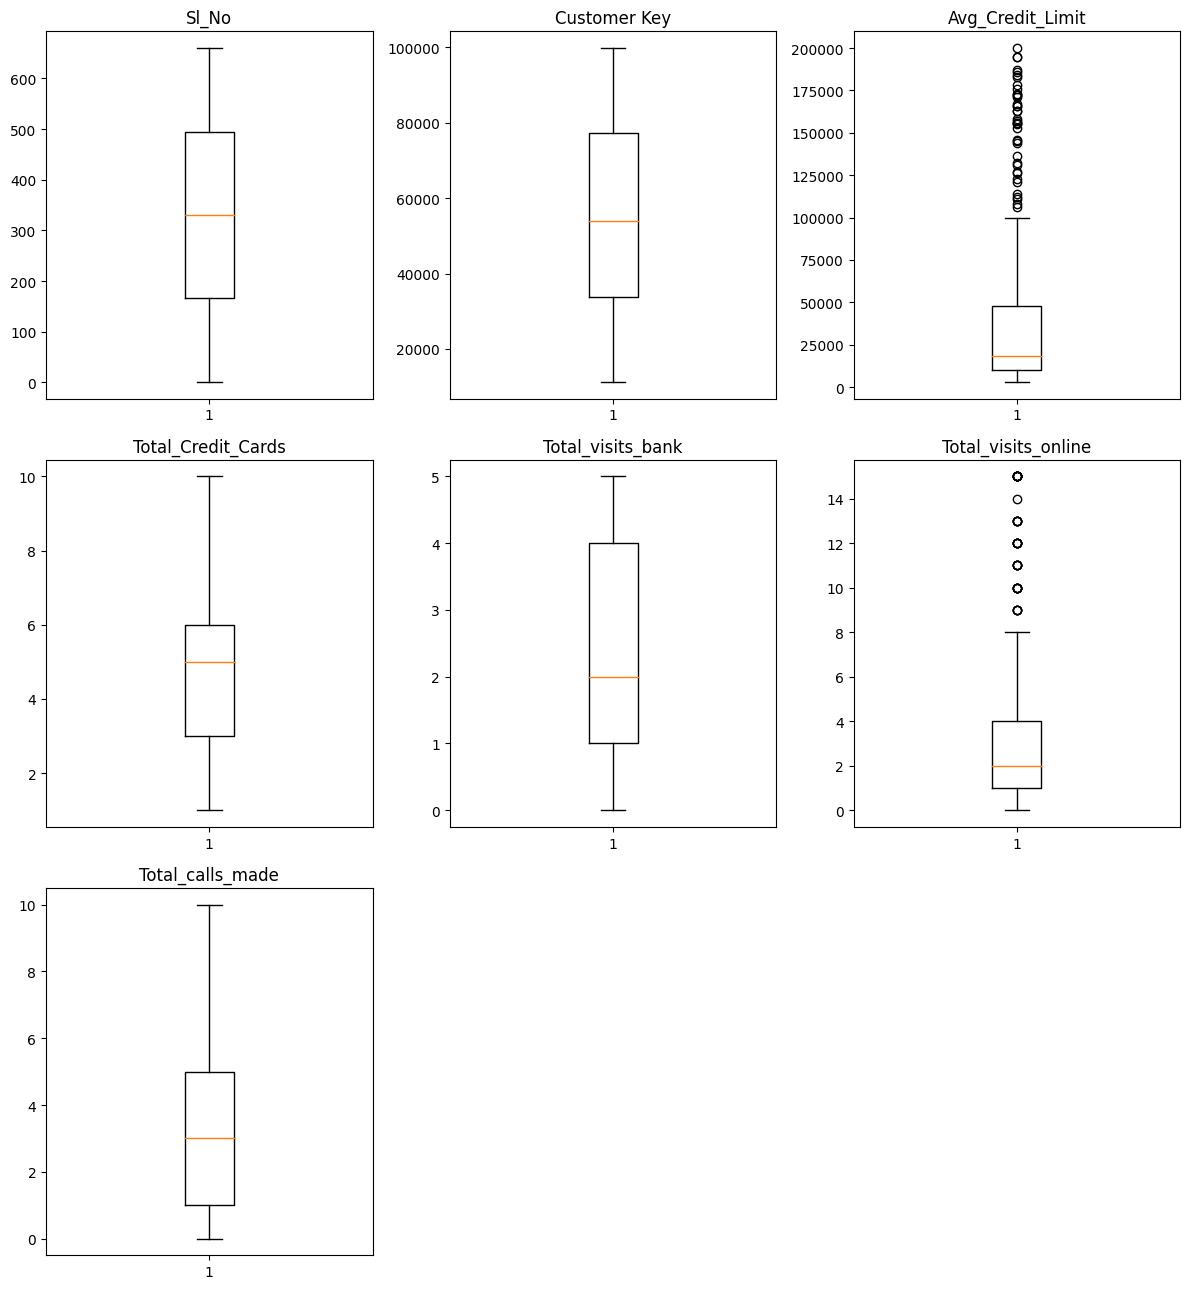

In [7]:
columns = df.columns
fig, axes = plt.subplots(nrows =3, ncols =3, figsize= (12, 13))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    
for j in range(len(columns), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

In [8]:
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df [field_name], 75)) ].index, inplace=True) 
    df.drop(df[df[field_name] < (np.percentile(df [field_name], 25) - iqr)].index, inplace=True)

In [9]:
outliers_cols =['Avg_Credit_Limit', 'Total_visits_online']
    
for col in outliers_cols:
    drop_outliers(df, col)

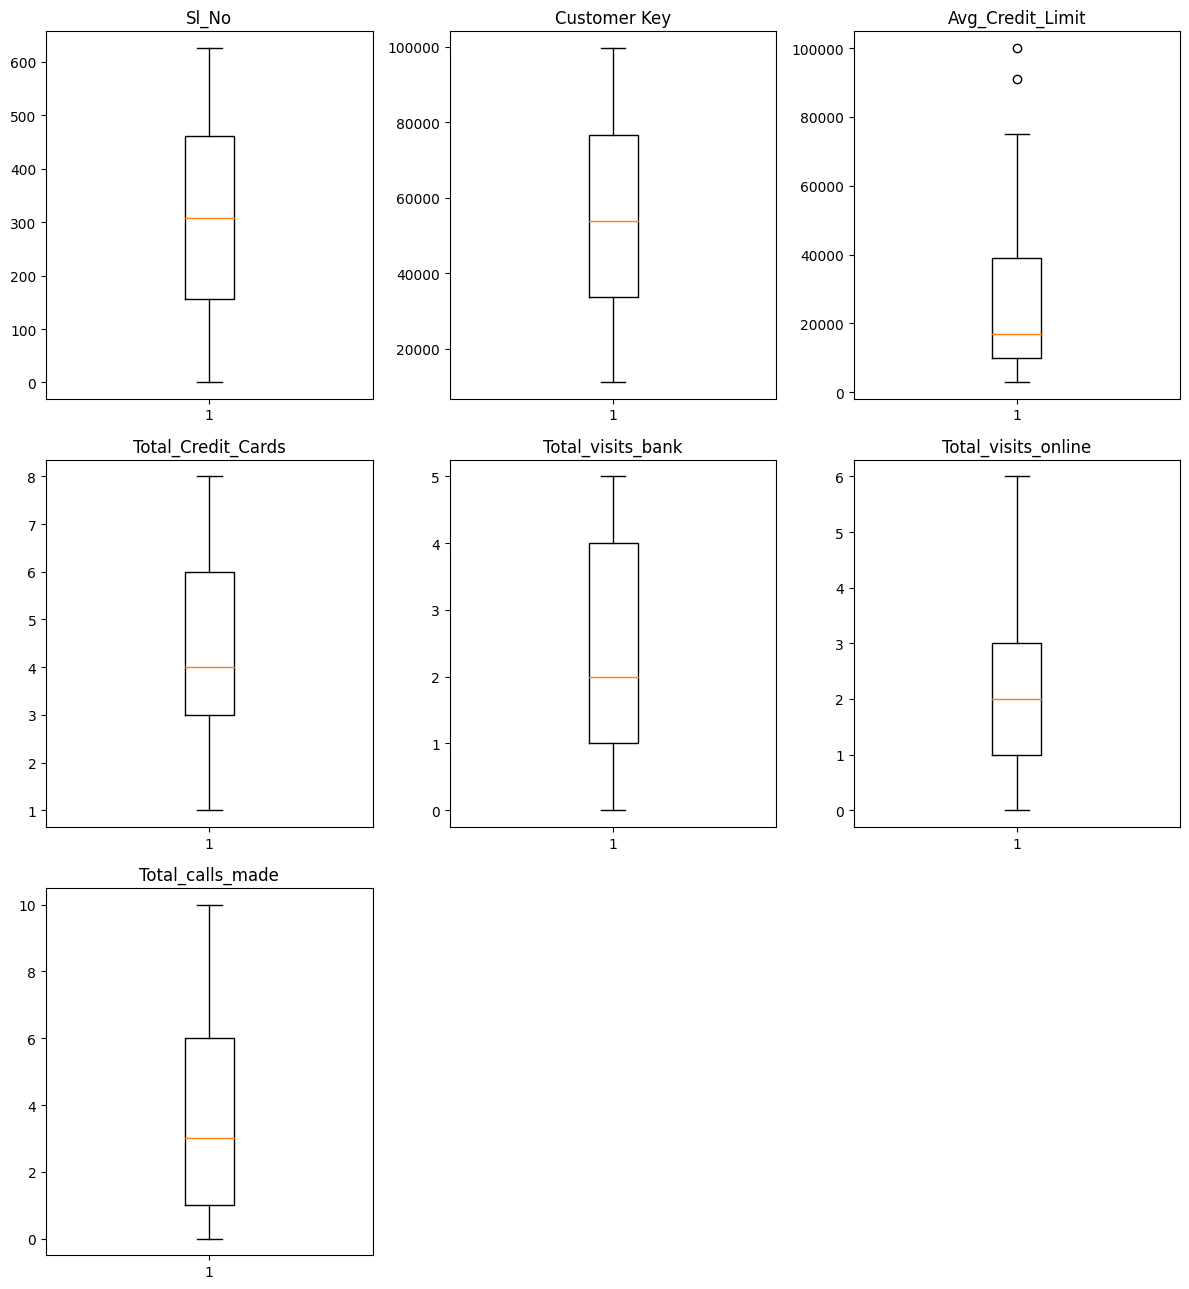

In [10]:
fig, axes = plt.subplots(nrows =3, ncols =3, figsize= (12, 13))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    
for j in range(len(columns), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

### K-means Clustering

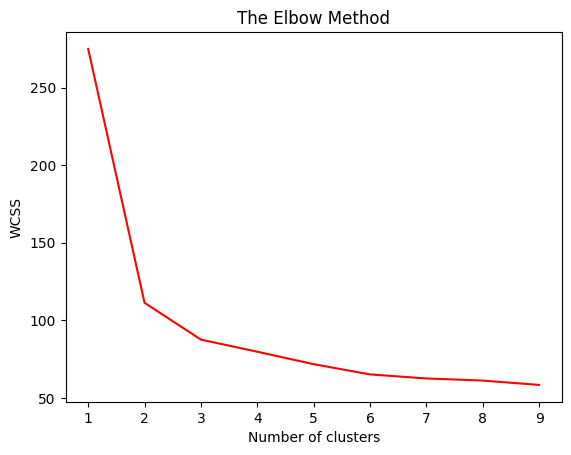

In [14]:
import warnings  
warnings.filterwarnings('ignore')

X = df.drop(['Sl_No', 'Customer Key'], axis=1).reset_index()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

wcss=[]
#assuming the number of K is between 1 and 10
for i in range(1,10):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
# fitting input data
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
df['Cluster'] = labels
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,0
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
5,6,58634,20000,3,0,1,8,1
7,8,37376,15000,3,0,1,1,1


In [16]:
centroids

array([[0.80413023, 0.4926876 , 0.65116279, 0.68093023, 0.1627907 ,
        0.20325581],
       [0.18476429, 0.09563697, 0.20471939, 0.18660714, 0.58630952,
        0.68482143],
       [0.50206316, 0.09796829, 0.6374269 , 0.72046784, 0.16861598,
        0.19415205]])

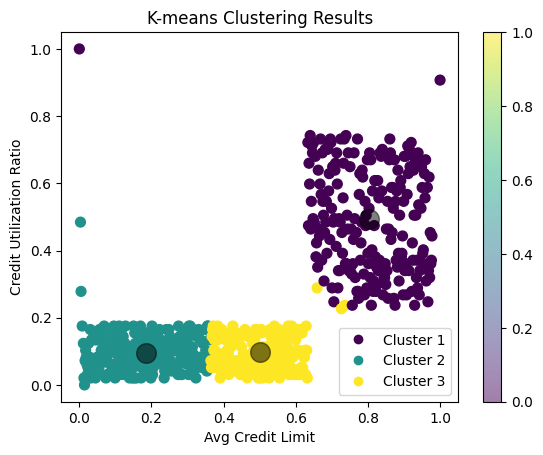

In [17]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.xlabel('Avg Credit Limit')
plt.ylabel('Credit Utilization Ratio')
plt.title('K-means Clustering Results')
plt.colorbar()